In [1]:
!pip install numpy
!pip install matplotlib
!pip install pandas


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Load CSV

- Load the CSV file containing the scores data
- Filter the data to include only the "Foundations of ML" course

In [3]:
df = pd.read_csv('data/raw/scores.csv')
df = df[df['CourseName'] == 'Foundations of ML']
df.head()

,MemberName,EducationLevel,Attendance,TotalHours,AssignmentsCompleted,HackathonParticipation,GitHubScore,PeerReviewScore,CourseName,CapstoneScore
0,Theekshana Rathnayake,3,79.9,43.7,2,0,62.8,5.0,Foundations of ML,45.3
1,Mayura Sandakalum Sellapperuma,2,76.8,95.6,6,0,87.4,2.7,Foundations of ML,78.8
2,Amila Narangoda,3,96.6,75.9,8,0,98.4,2.8,Foundations of ML,65.4
4,Tharusha Vihanga,2,83.2,24.0,6,0,41.8,4.2,Foundations of ML,40.1
7,Chamath Perera,3,86.5,88.0,5,0,23.9,1.3,Foundations of ML,68.2


### Load features and scale

In [4]:
def min_max_scale(X):
    X_min = np.min(X, axis=0)
    X_max = np.max(X, axis=0)
    X_scaled = (X - X_min) / (X_max - X_min)
    return X_scaled, X_min, X_max

In [5]:
X_attendance = df['Attendance'].values
X_attendance_scaled, X_attendance_min, X_attendance_max = min_max_scale(X_attendance.reshape(-1, 1))

X_study_hours = df['TotalHours'].values
X_study_hours_scaled, X_study_hours_min, X_study_hours_max = min_max_scale(X_study_hours.reshape(-1, 1))

X_assignments = df['AssignmentsCompleted'].values
X_assignments_scaled, X_assignments_min, X_assignments_max = min_max_scale(X_assignments.reshape(-1, 1))

X_quiz = df['PeerReviewScore'].values
X_quiz_scaled, X_quiz_min, X_quiz_max = min_max_scale(X_quiz.reshape(-1, 1))

X_participation = df['HackathonParticipation'].values
X_participation_scaled, X_participation_min, X_participation_max = min_max_scale(X_participation.reshape(-1, 1))

Y = df['CapstoneScore'].values
Y_scaled, Y_min, Y_max = min_max_scale(Y.reshape(-1, 1))

In [6]:
X = np.column_stack([
    np.ones(len(df)),
    X_attendance_scaled.flatten(),
    X_study_hours_scaled.flatten(),
    X_assignments_scaled.flatten(),
    X_quiz_scaled.flatten(),
    X_participation_scaled.flatten()
])

y = Y_scaled.flatten()

### Util functions

- format_value_for_printing: Format values for better readability

In [7]:
def format_value_for_printing(value):
    if np.isinf(value):
        return "∞"
    elif np.isnan(value):
        return "NaN"
    else:
        return f"{value:.4f}"

### Analyzing Functions

- create_polynomial_features: Create polynomial features to specified degree
- fit_polynomial: Fit a polynomial regression model

In [8]:
# Constants
CONVERGENCE_THRESHOLD = 1e-6

In [9]:
def create_polynomial_features(X, degree):
    if X.ndim == 1:
        X = X.reshape(-1, 1)

    m, n_features = X.shape
    X_poly = np.ones((m, 1))

    for d in range(1, degree + 1):
        for feature_idx in range(n_features):
            feature_power = X[:, feature_idx] ** d
            X_poly = np.column_stack([X_poly, feature_power])

    return X_poly


def fit_polynomial(X, y, degree, learning_rate):
    num_iterations = 100000
    cost_history = []
    converged = False

    X_poly = create_polynomial_features(X, degree)
    n_features = X_poly.shape[1]
    beta = np.random.normal(0, 0.01, n_features)
    m = len(y)

    for i in range(num_iterations):
        predictions = X_poly.dot(beta)
        cost = (1 / (2 * m)) * np.sum((predictions - y) ** 2)
        cost_history.append(cost)

        gradients = (1 / m) * X_poly.T.dot(predictions - y)
        beta = beta - learning_rate * gradients

        # Check for convergence
        if i > 10:
            change = abs(cost_history[-1] - cost_history[-10])
            if change < CONVERGENCE_THRESHOLD:
                print(f"Converged at {i}")
                converged = True
                break

        # Check for non convergence
        if np.isinf(cost):
            print("Cost diverged. Exiting...")
            break

    return beta, cost_history, converged

def predict_polynomial(X, beta, degree):
    X_poly = create_polynomial_features(X, degree)
    predictions = X_poly.dot(beta)
    return predictions

### Prediction

In [10]:
model_1 = fit_polynomial(X, y, 1, learning_rate=0.00001)
model_2 = fit_polynomial(X, y, 2, learning_rate=0.00001)
model_3 = fit_polynomial(X, y, 3, learning_rate=0.00001)

Converged at 73861
Converged at 59705
Converged at 61105


### Visualize results

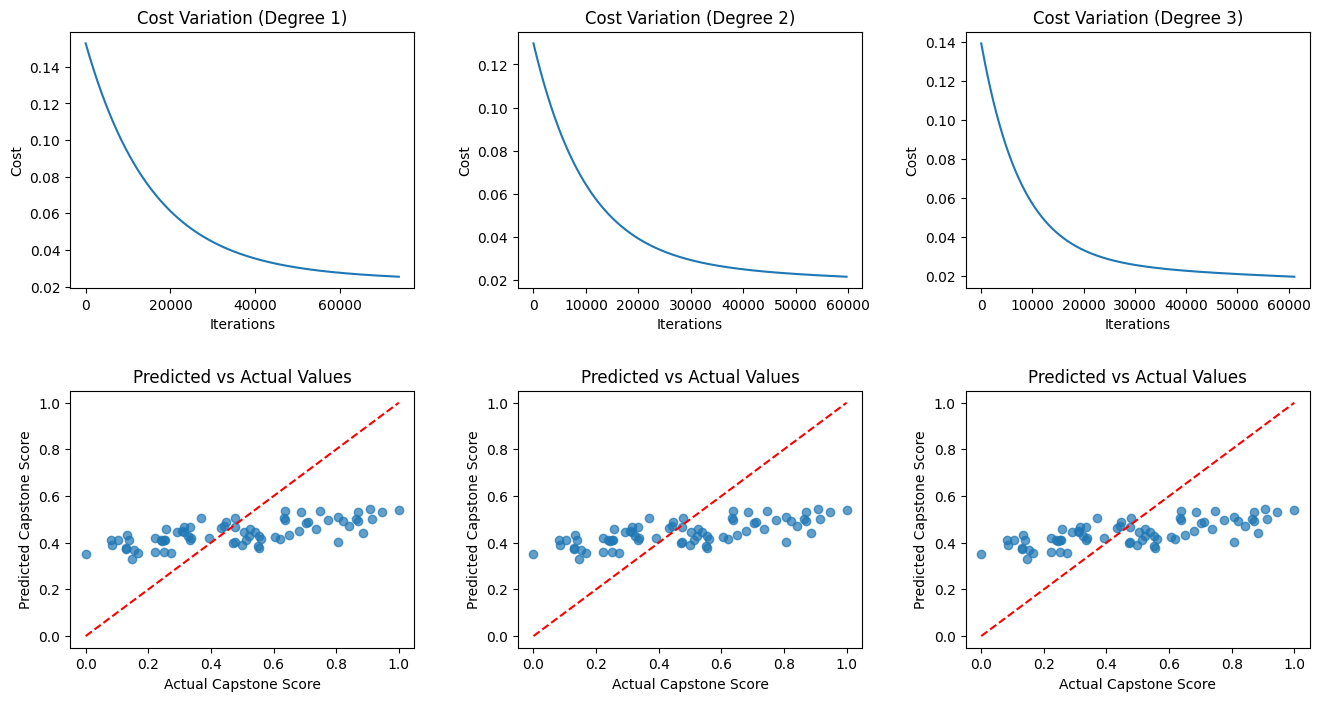

In [11]:
fig, axes = plt.subplots(2, 3, figsize=(16, 8))

x_min, x_max = float(np.min(X)), float(np.max(X))
x_interval = np.linspace(x_min, x_max, 100)

ax = axes[0, 0]
ax.plot(model_1[1], label='Degree 1')
ax.set_title('Cost Variation (Degree 1)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[0, 1]
ax.plot(model_2[1], label='Degree 2')
ax.set_title('Cost Variation (Degree 2)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[0, 2]
ax.plot(model_3[1], label='Degree 3')
ax.set_title('Cost Variation (Degree 3)')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')

ax = axes[1, 0]
prediction_1 = predict_polynomial(X, model_1[0], 1)
min_val = min(y.min(), prediction_1.min())
max_val = max(y.max(), prediction_1.max())
ax.scatter(y, prediction_1, alpha=0.7)
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
ax.set_xlabel('Actual Capstone Score')
ax.set_ylabel('Predicted Capstone Score')
ax.set_title('Predicted vs Actual Values')

ax = axes[1, 1]
prediction_2 = predict_polynomial(X, model_1[0], 1)
min_val = min(y.min(), prediction_2.min())
max_val = max(y.max(), prediction_2.max())
ax.scatter(y, prediction_2, alpha=0.7)
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
ax.set_xlabel('Actual Capstone Score')
ax.set_ylabel('Predicted Capstone Score')
ax.set_title('Predicted vs Actual Values')

ax = axes[1, 2]
prediction_3 = predict_polynomial(X, model_1[0], 1)
min_val = min(y.min(), prediction_3.min())
max_val = max(y.max(), prediction_3.max())
ax.scatter(y, prediction_3, alpha=0.7)
ax.plot([min_val, max_val], [min_val, max_val], 'r--', label='Perfect Prediction')
ax.set_xlabel('Actual Capstone Score')
ax.set_ylabel('Predicted Capstone Score')
ax.set_title('Predicted vs Actual Values')

plt.subplots_adjust(
    hspace=0.4,
    wspace=0.3
)
plt.show()

### Evaluation metrics

In [12]:
def calculate_evaluation_metrics(X, Y, beta, degree):
    y_hat = predict_polynomial(X, beta, degree)
    residuals = Y - y_hat
    mse = np.mean(residuals ** 2)
    mae = np.mean(abs(residuals))
    rmse = np.sqrt(mse)
    r_squared = 1 - (np.sum(residuals ** 2) / np.sum((Y - np.mean(Y)) ** 2))

    return mse, mae, rmse, r_squared

In [13]:
print("\n" + "="*70)
print("EVALUATION SUMMARY")
print("="*70)
print(f"{'Degree':<15} {'MSE':<12} {'MAE':<12} {'RMSE':<12} {'R²':<12}")
print("-"*70)

for i in range (1, 4):
    beta = eval(f'model_{i}')[0]
    mse, mae, rmse, r_squared = calculate_evaluation_metrics(X, y, beta, i)
    print(f"{i:<15} {format_value_for_printing(mse):<12} {format_value_for_printing(mae):<12} {format_value_for_printing(rmse):<12} {format_value_for_printing(r_squared):<12}")


EVALUATION SUMMARY
Degree          MSE          MAE          RMSE         R²          
----------------------------------------------------------------------
1               0.0507       0.1946       0.2252       0.2268      
2               0.0429       0.1818       0.2072       0.3456      
3               0.0392       0.1742       0.1980       0.4026      
